In [1]:
import pandas as pd
# pd.set_option('max_colwidth', 50)
# set this if you need to

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The Health Department has developed an inspection report and scoring system. 
After conducting an inspection of the facility, the Health Inspector calculates a score based on the violations observed. 
Violations can fall into:
- **high risk category**: records specific violations that directly relate to the transmission of food borne illnesses,the adulteration of food products and the contamination of food-contact surfaces.
- **moderate risk category**: records specific violations that are of a moderate risk to the public health and safety.
- **low risk category**: records violations that are low risk or have no immediate risk to the public health and safety.

In [3]:
businesses = pd.read_csv('./data/businesses_plus.csv', parse_dates=True, dtype={'phone_number': str})
businesses.head()
# dtype casts the column as a specific data type

,business_id,name,address,city,postal_code,latitude,longitude,phone_number,TaxCode,business_certificate,application_date,owner_name,owner_address,owner_city,owner_state,owner_zip
0,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
1,19,Nrgize Lifestyle Cafe,"1200 Van Ness Ave, 3rd Floor",San Francisco,94109,37.786848,-122.421547,NaN,H24,NaN,NaN,24 Hour Fitness Inc,"1200 Van Ness Ave, 3rd Floor",San Francisco,CA,94109
2,24,OMNI S.F. Hotel - 2nd Floor Pantry,"500 California St, 2nd Floor",San Francisco,94104,37.792888,-122.403135,NaN,H24,352312.0,NaN,OMNI San Francisco Hotel Corp,"500 California St, 2nd Floor",San Francisco,CA,94104
3,31,Norman's Ice Cream and Freezes,2801 Leavenworth St,San Francisco,94133,37.807155,-122.419004,NaN,H24,346882.0,NaN,Norman Antiforda,2801 Leavenworth St,San Francisco,CA,94133
4,45,CHARLIE'S DELI CAFE,3202 FOLSOM St,S.F.,94110,37.747114,-122.413641,NaN,H24,340024.0,10/10/2001,"HARB, CHARLES AND KRISTIN",1150 SANCHEZ,S.F.,CA,94114


In [52]:
inspections = pd.read_csv('./data/inspections_plus.csv', parse_dates = ['date'])
inspections.head()

,business_id,Score,date,type
0,10,NaN,2014-08-07,Reinspection/Followup
1,10,94.0,2014-07-29,Routine - Unscheduled
2,10,NaN,2014-01-24,Reinspection/Followup
3,10,92.0,2014-01-14,Routine - Unscheduled
4,19,94.0,2014-11-10,Routine - Unscheduled


In [53]:
inspections.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27285 entries, 0 to 27284
Data columns (total 4 columns):
business_id    27285 non-null int64
Score          15263 non-null float64
date           27285 non-null datetime64[ns]
type           27285 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 852.7+ KB


In [5]:
violations = pd.read_csv('./data/violations_plus.csv', parse_dates=True)
violations.head()

,business_id,date,ViolationTypeID,risk_category,description
0,10,20140114,103154,Low Risk,Unclean or degraded floors walls or ceilings
1,10,20140114,103119,Moderate Risk,Inadequate and inaccessible handwashing facili...
2,10,20140114,103145,Low Risk,Improper storage of equipment utensils or linens
3,10,20140729,103129,Moderate Risk,Insufficient hot water or running water
4,10,20140729,103144,Low Risk,Unapproved or unmaintained equipment or utensils


In [6]:
# 1 Combine the three dataframes into one data frame called restaurant_scores
# Hint: http://pandas.pydata.org/pandas-docs/stable/merging.html

restaurant_scores = pd.merge(inspections, violations, on = ['business_id', 'date'])
restaurant_scores = pd.merge(businesses, restaurant_scores, on = 'business_id')
restaurant_scores.head()

,business_id,name,address,city,postal_code,latitude,longitude,phone_number,TaxCode,business_certificate,...,owner_address,owner_city,owner_state,owner_zip,Score,date,type,ViolationTypeID,risk_category,description
0,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,33 Belden St,San Francisco,CA,94104,94.0,20140729,Routine - Unscheduled,103129,Moderate Risk,Insufficient hot water or running water
1,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,33 Belden St,San Francisco,CA,94104,94.0,20140729,Routine - Unscheduled,103144,Low Risk,Unapproved or unmaintained equipment or utensils
2,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,33 Belden St,San Francisco,CA,94104,92.0,20140114,Routine - Unscheduled,103154,Low Risk,Unclean or degraded floors walls or ceilings
3,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,33 Belden St,San Francisco,CA,94104,92.0,20140114,Routine - Unscheduled,103119,Moderate Risk,Inadequate and inaccessible handwashing facili...
4,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,33 Belden St,San Francisco,CA,94104,92.0,20140114,Routine - Unscheduled,103145,Low Risk,Improper storage of equipment utensils or linens


In [7]:
# 2 Which ten business have had the most inspections?

inspections.business_id.value_counts().head(10)

1775     21
74374    20
2505     20
71618    19
74131    19
67154    19
71804    19
489      18
7747     18
65523    17
Name: business_id, dtype: int64

In [8]:
# 3 Group and count the inspections by type

inspections.type.value_counts()

Routine - Unscheduled                15481
Reinspection/Followup                 5386
New Ownership                         1877
Complaint                             1634
New Construction                      1613
Non-inspection site visit              840
Complaint Reinspection/Followup        163
Structural Inspection                  120
Foodborne Illness Investigation        100
Routine - Scheduled                     63
Administrative or Document Review        4
Special Event                            2
Multi-agency Investigation               2
Name: type, dtype: int64

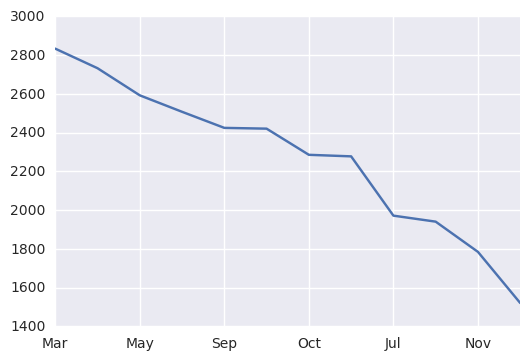

In [55]:
# 4 Create a plot that shows number of inspections per month
# Bonus for creating a heatmap
# http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.heatmap.html?highlight=heatmap

inspections['date'].dt.strftime('%b').value_counts().plot()

In [10]:
# 5 Which zip code contains the most high risk violations?

restaurant_scores[restaurant_scores['risk_category'] == 'High Risk'].postal_code.value_counts().head(1)

94133    618
Name: postal_code, dtype: int64

In [11]:
# 6 If inspection is prompted by a change in restaurant ownership, 
# is the inspection more likely to be categorized as higher or lower risk?

restaurant_scores.risk_category[restaurant_scores['type'] == 'New Ownership'].value_counts()

Low Risk         553
Moderate Risk    419
High Risk        148
Name: risk_category, dtype: int64

In [12]:
# 7 Examining the descriptions, what is the most common violation?

violations.description.value_counts().head(1)

Unclean or degraded floors walls or ceilings    3395
Name: description, dtype: int64

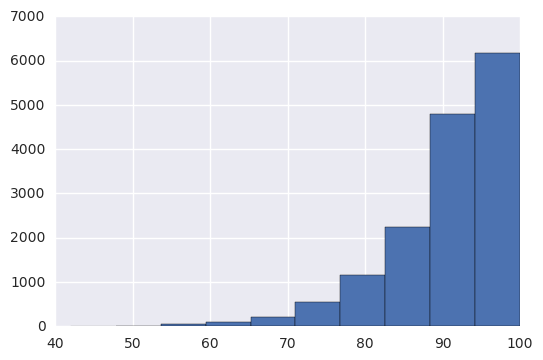

In [56]:
# 8 Create a hist of the scores with 10 bins

inspections['Score'].hist(bins = 10)

In [71]:
# 9 Can you predict risk category based on the other features in this dataset? Higher scores are lower risk

restaurant_scores.risk_category[restaurant_scores['Score'] > 75].value_counts()

Low Risk         17840
Moderate Risk    11180
High Risk         3629
Name: risk_category, dtype: int64

In [76]:
# 10 Extra Credit:
# Use Instagram location API to find pictures taken at the lat, long of the most High Risk restaurant
# https://www.instagram.com/developer/endpoints/locations/

restaurant_scores[restaurant_scores['risk_category'] == 'High Risk'].head()

,business_id,name,address,city,postal_code,latitude,longitude,phone_number,TaxCode,business_certificate,...,owner_address,owner_city,owner_state,owner_zip,Score,date,type,ViolationTypeID,risk_category,description
48,58,Oasis Grill,91 Drumm St,San Francisco,94111,37.794483,-122.396584,NaN,H24,954377.0,...,91 Drumm St,San Francisco,CA,94111,78.0,20140725,Routine - Unscheduled,103109,High Risk,Unclean or unsanitary food contact surfaces
49,58,Oasis Grill,91 Drumm St,San Francisco,94111,37.794483,-122.396584,NaN,H24,954377.0,...,91 Drumm St,San Francisco,CA,94111,78.0,20140725,Routine - Unscheduled,103114,High Risk,High risk vermin infestation
67,66,STARBUCKS,1800 IRVING St,S.F.,94122,37.763578,-122.477461,NaN,H24,911744.0,...,1800 IRVING St,S.F.,CA,94122,91.0,20140519,Routine - Unscheduled,103112,High Risk,No hot water or running water
70,67,Revolution Cafe,3248 22nd St,SF,94110,37.755419,-122.419542,NaN,H24,NaN,...,3248 22nd St.,SF,CA,94110,87.0,20160401,Routine - Unscheduled,103109,High Risk,Unclean or unsanitary food contact surfaces
80,73,DINO'S UNCLE VITO,2101 Fillmore St,San Francisco,94115,37.788932,-122.433895,NaN,H24,186790.0,...,\t2101 FILLMORE ST,SAN FRANCISCO,CA,94115,85.0,20150717,Routine - Unscheduled,103103,High Risk,High risk food holding temperature


In [78]:
#https://api.instagram.com/v1/locations/search?lat=37.794483&lng=-122.396584&access_token=145677507.717d650.794fe62f43014634985e6694cdabd845

In [16]:
############################
### A Little More Morbid ###
############################

In [17]:
killings = pd.read_csv('./data/police-killings.csv')
killings.head()

,Unnamed: 0,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,lawenforcementagency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


In [18]:
# 1. Make the following changed to column names:
# lawenforcementagency -> agency
# raceethnicity        -> race

killings.rename(columns = {'Lawenforcementagency': 'agency', 'raceethnicity': 'race'}, inplace = True)

In [19]:
# 2. Show the count of missing values in each column

killings.isnull().sum()

Unnamed: 0              0
name                    0
age                     0
gender                  0
race                    0
month                   0
day                     0
year                    0
streetaddress           4
city                    0
state                   0
lawenforcementagency    0
cause                   0
armed                   0
county_income           0
dtype: int64

In [20]:
# 3. replace each null value in the dataframe with the string "Unknown"

killings.fillna('Unknown', inplace = True)

In [21]:
# 4. How many killings were there so far in 2015?

killings[killings['year'] == 2015].name.count()

467

In [22]:
# 5. Of all killings, how many were male and how many female?

killings.gender.value_counts()

Male      445
Female     22
Name: gender, dtype: int64

In [23]:
# 6. How many killings were of unarmed people?

killings[killings['armed'] == 'No'].name.count()

102

In [24]:
# 7. What percentage of all killings were unarmed?

float(killings[killings['armed'] == 'No'].name.count()) / float(killings.name.count()) * 100

21.841541755888652

In [25]:
# 8. What are the 5 states with the most killings?

killings.state.value_counts().head()

CA    74
TX    46
FL    29
AZ    25
OK    22
Name: state, dtype: int64

In [26]:
# 9. Show a value counts of deaths for each race

killings.race.value_counts()

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: race, dtype: int64

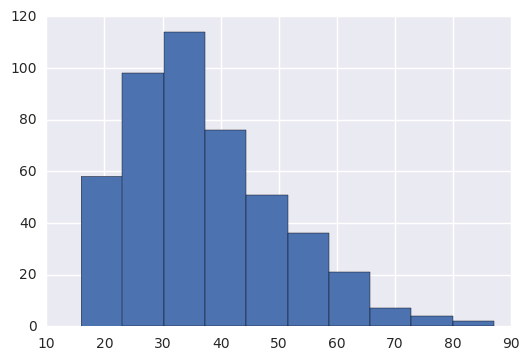

In [57]:
# 10. Display a histogram of ages of all killings

killings['age'].hist(bins = 10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000128874E0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000012FF86A0>]], dtype=object)

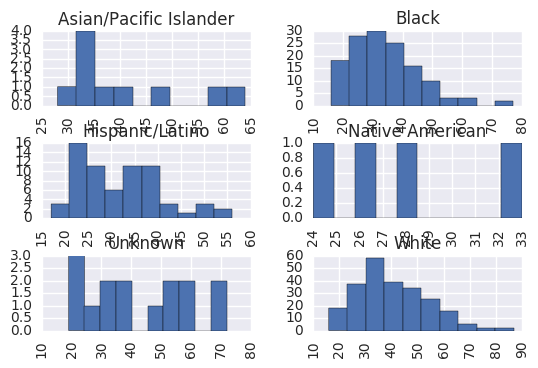

In [58]:
# 11. Show 6 histograms of ages by race

killings.age.hist(by = killings.race)

In [29]:
# 12. What is the average age of death by race?

killings.groupby('race').age.mean()

race
Asian/Pacific Islander    40.800000
Black                     34.044444
Hispanic/Latino           31.716418
Native American           27.750000
Unknown                   43.533333
White                     40.466102
Name: age, dtype: float64

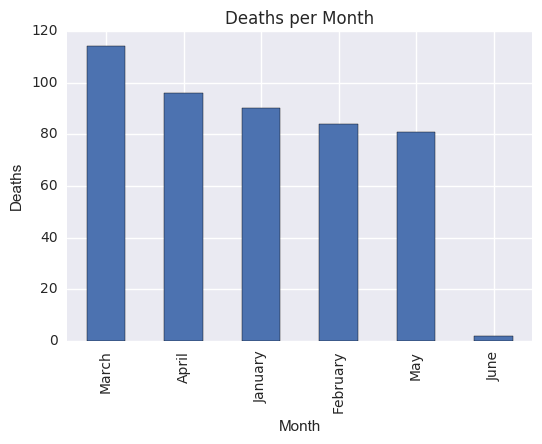

In [59]:
# 13. Show a bar chart with counts of deaths every month

killings.month.value_counts().plot(kind = 'bar', title = 'Deaths per Month')
plt.xlabel('Month')
plt.ylabel('Deaths')

In [31]:
###################
### Less Morbid ###
###################

In [32]:
majors = pd.read_csv('./data/college-majors.csv')
majors.head()

,Unnamed: 0,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0
2,2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0
3,3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0
4,4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0


In [33]:
# 1. Delete the columns (employed_full_time_year_round, major_code)

majors.drop(majors.columns[[6, 1]], axis = 1)

,Unnamed: 0,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th
0,0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000,34000,80000.0
1,1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,54000,36000,80000.0
2,2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248,63000,40000,98000.0
3,3,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679,46000,30000,72000.0
4,4,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188,62000,38500,90000.0
5,5,PLANT SCIENCE AND AGRONOMY,Agriculture & Natural Resources,79409,63043,2070,0.031791,50000,35000,75000.0
6,6,SOIL SCIENCE,Agriculture & Natural Resources,6586,4926,264,0.050867,63000,39400,88000.0
7,7,MISCELLANEOUS AGRICULTURE,Agriculture & Natural Resources,8549,6392,261,0.039230,52000,35000,75000.0
8,8,ENVIRONMENTAL SCIENCE,Biology & Life Science,106106,87602,4736,0.051290,52000,38000,75000.0
9,9,FORESTRY,Agriculture & Natural Resources,69447,48228,2144,0.042563,58000,40500,80000.0


In [34]:
# 2. Show the cout of missing values in each column

majors.isnull().sum()

Unnamed: 0                       0
Major_code                       0
Major                            0
Major_category                   0
Total                            0
Employed                         0
Employed_full_time_year_round    0
Unemployed                       0
Unemployment_rate                0
Median                           0
P25th                            0
P75th                            0
dtype: int64

In [35]:
# 3. What are the top 10 highest paying majors?

majors.groupby('Major').Median.max().head(10)

Major
ACCOUNTING                               65000
ACTUARIAL SCIENCE                        72000
ADVERTISING AND PUBLIC RELATIONS         50000
AEROSPACE ENGINEERING                    80000
AGRICULTURAL ECONOMICS                   63000
AGRICULTURE PRODUCTION AND MANAGEMENT    54000
ANIMAL SCIENCES                          46000
ANTHROPOLOGY AND ARCHEOLOGY              43000
APPLIED MATHEMATICS                      70000
ARCHITECTURAL ENGINEERING                78000
Name: Median, dtype: int64

In [36]:
# 4. Plot the data from the last question in a bar chart, include proper title, and labels!

In [37]:
# 5. What is the average median salary for each major category?

majors.groupby('Major').Median.mean()

Major
ACCOUNTING                                       65000
ACTUARIAL SCIENCE                                72000
ADVERTISING AND PUBLIC RELATIONS                 50000
AEROSPACE ENGINEERING                            80000
AGRICULTURAL ECONOMICS                           63000
AGRICULTURE PRODUCTION AND MANAGEMENT            54000
ANIMAL SCIENCES                                  46000
ANTHROPOLOGY AND ARCHEOLOGY                      43000
APPLIED MATHEMATICS                              70000
ARCHITECTURAL ENGINEERING                        78000
ARCHITECTURE                                     63000
AREA ETHNIC AND CIVILIZATION STUDIES             46000
ART AND MUSIC EDUCATION                          42600
ART HISTORY AND CRITICISM                        44500
ASTRONOMY AND ASTROPHYSICS                       80000
ATMOSPHERIC SCIENCES AND METEOROLOGY             60000
BIOCHEMICAL SCIENCES                             53000
BIOLOGICAL ENGINEERING                           62000
BIOL

In [38]:
# 6. Show only the top 5 paying major categories

majors.groupby('Major').Median.mean().head()

Major
ACCOUNTING                          65000
ACTUARIAL SCIENCE                   72000
ADVERTISING AND PUBLIC RELATIONS    50000
AEROSPACE ENGINEERING               80000
AGRICULTURAL ECONOMICS              63000
Name: Median, dtype: int64

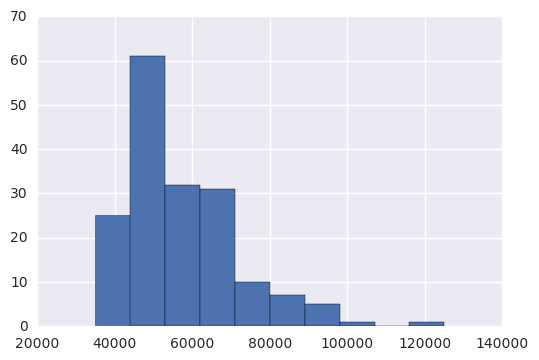

In [60]:
# 7. Plot a histogram of the distribution of median salaries

majors['Median'].hist(bins = 10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001380D438>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000001497D6A0>]], dtype=object)

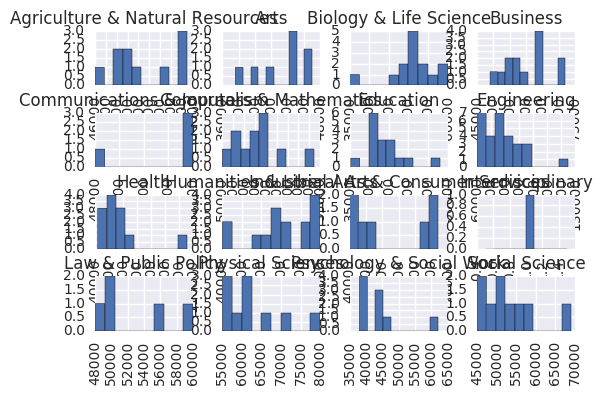

In [61]:
# 8. Plot a histogram of the distribution of median salaries by major category

majors.Median.hist(by = majors.Major_category)

In [41]:
# 9. What are the top 10 most UNemployed majors?

majors[['Major', 'Unemployed']].sort_index(by = 'Unemployed', ascending = False).head(10)

C:\Users\sglembocki\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


,Major,Unemployed
161,BUSINESS MANAGEMENT AND ADMINISTRATION,147261
158,GENERAL BUSINESS,85626
114,PSYCHOLOGY,79066
159,ACCOUNTING,75379
13,COMMUNICATIONS,54390
73,ENGLISH LANGUAGE AND LITERATURE,52248
164,MARKETING AND MARKETING RESEARCH,51839
132,POLITICAL SCIENCE AND GOVERNMENT,40376
25,GENERAL EDUCATION,38742
78,BIOLOGY,36757


In [42]:
# What are the unemployment rates?
majors['Unemployment_rate'] = (majors.Unemployed / (majors.Unemployed + majors.Employed) * 100)
majors[['Major', 'Unemployment_rate']].sort_index(by = 'Unemployment_rate', ascending = False)

C:\Users\sglembocki\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


,Major,Unemployment_rate
146,MISCELLANEOUS FINE ARTS,15.614749
116,CLINICAL PSYCHOLOGY,10.271216
93,MILITARY TECHNOLOGIES,10.179641
27,SCHOOL STUDENT COUNSELING,10.174594
77,LIBRARY SCIENCE,9.484299
141,VISUAL AND PERFORMING ARTS,9.465800
19,COMPUTER PROGRAMMING AND DATA PROCESSING,9.026422
119,SOCIAL PSYCHOLOGY,8.733624
104,ASTRONOMY AND ASTROPHYSICS,8.602151
11,ARCHITECTURE,8.599113


In [43]:
# 10. What are the top 10 most UNemployed majors CATEGORIES? Use the mean for each category
# What are the unemployment rates?

majors.groupby('Major_category').Unemployment_rate.mean()

Major_category
Agriculture & Natural Resources        3.956918
Arts                                   8.760052
Biology & Life Science                 4.993597
Business                               5.449602
Communications & Journalism            6.912452
Computers & Mathematics                5.943698
Education                              4.676196
Engineering                            5.063002
Health                                 4.720928
Humanities & Liberal Arts              6.942871
Industrial Arts & Consumer Services    5.854567
Interdisciplinary                      7.726897
Law & Public Policy                    6.785356
Physical Sciences                      5.454062
Psychology & Social Work               7.786702
Social Science                         6.568566
Name: Unemployment_rate, dtype: float64

In [44]:
# 11. the total and employed column refer to the people that were surveyed.
# Create a new column showing the emlpoyment rate of the people surveyed for each major
# call it "sample_employment_rate"
# Example the first row has total: 128148 and employed: 90245. it's 
# sample_employment_rate should be 90245.0 / 128148.0 = .7042

majors['sample_employment_rate'] = majors['Employed'] / majors['Total']
majors.head()

,Unnamed: 0,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,sample_employment_rate
0,0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,2.614711,50000,34000,80000.0,0.704225
1,1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,2.863606,54000,36000,80000.0,0.806338
2,2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,3.024832,63000,40000,98000.0,0.775173
3,3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,4.267890,46000,30000,72000.0,0.783948
4,4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,4.918845,62000,38500,90000.0,0.711738


In [45]:
# 12. Create a "sample_unemployment_rate" column
# this column should be 1 - "sample_employment_rate"

majors['sample_unemployment_rate'] = 1 - majors['sample_employment_rate']
majors.head()

,Unnamed: 0,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,sample_employment_rate,sample_unemployment_rate
0,0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,2.614711,50000,34000,80000.0,0.704225,0.295775
1,1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,2.863606,54000,36000,80000.0,0.806338,0.193662
2,2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,3.024832,63000,40000,98000.0,0.775173,0.224827
3,3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,4.267890,46000,30000,72000.0,0.783948,0.216052
4,4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,4.918845,62000,38500,90000.0,0.711738,0.288262
